In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
pd.options.display.max_columns=None


In [255]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [256]:
data_train = pd.read_csv('house_train_raw.csv')
data_test = pd.read_csv('houses_test_raw.csv')

### EDA

In [257]:
data_train.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [258]:
data_train.shape

(1460, 81)

In [259]:
data_test.shape

(1459, 80)

In [260]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [261]:
data_train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [262]:
data_train.drop(['Id'], axis=1, inplace=True)
data_test.drop(['Id'], axis=1, inplace=True)

In [263]:
#Columna objetivo es SalePrice
#Borro nulos en columna objetivo
data_train.dropna(axis=0, subset=['SalePrice'], inplace=True)

# borro objetivo del dataframe data_train

train = data_train.drop(['SalePrice'], axis=1)

Busco Nulos

In [264]:
#FUNCION QUE BUSCA VALORES NULOS
def missings(df,plot=True,rotation=90,figsize=(10,5),*kwargs):
    labels,values,percent = list(),list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isna().sum():
                labels.append(column)
                values.append(df[column].isna().sum())
                percent.append((df[column].isna().sum() / df.shape[0])*100)
        #Make a dataframe
        missings=pd.DataFrame({'Columna':labels,'Valores_nulos':values,'Vacios_porcentaje':percent}).sort_values(by='Vacios_porcentaje',ascending=False)
        
        if plot:
            plt.figure(figsize=figsize)
            plot = sns.barplot(x=missings.Columna,y=round(missings.Vacios_porcentaje, 2), palette = "YlOrBr")
            for i in plot.patches:
                plot.annotate(i.get_height(),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                ha = 'center', va = 'baseline', fontsize = 12,
                color = 'black', xytext = (0,1),
                textcoords = 'offset pixels')
            locs, labels = plt.xticks()
            plt.setp(labels, rotation=rotation,size=16)
            plt.xlabel('Columna',size=18)
            plt.ylabel('Porcent',size=18)
            plot.set_title('Porcentaje de valores nulos',size=18)
            return missings
    else:
            return False

,Columna,Valores_nulos,Vacios_porcentaje
16,PoolQC,1453,99.520548
18,MiscFeature,1406,96.301370
1,Alley,1369,93.767123
17,Fence,1179,80.753425
10,FireplaceQu,690,47.260274
0,LotFrontage,259,17.739726
11,GarageType,81,5.547945
12,GarageYrBlt,81,5.547945
13,GarageFinish,81,5.547945
14,GarageQual,81,5.547945


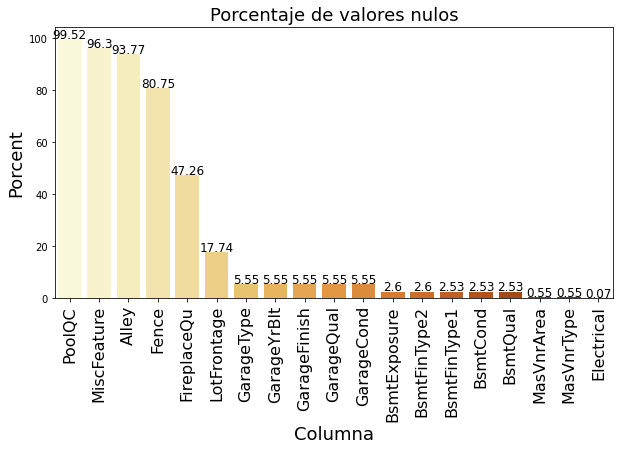

In [265]:
missings(train)

COLUMNA OBJETIVO: SalePrice

c:\Users\maty_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


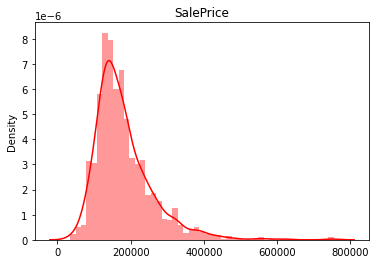

In [266]:
sns.distplot(a=data_train['SalePrice'],color='red',axlabel=False).set_title('SalePrice')
plt.show()

In [267]:
#Aplico logaritmo a SalePrice
data_train['SalePrice']=np.log1p(data_train['SalePrice'])

c:\Users\maty_\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


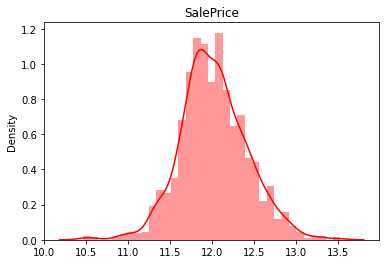

In [268]:
sns.distplot(a=data_train['SalePrice'],color='red',axlabel=False).set_title('SalePrice')
plt.show()

In [269]:
#Columnas mas relacionadas con el objetivo
data_train.corr()['SalePrice'].sort_values(ascending=False).head(40)

SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

<AxesSubplot:>

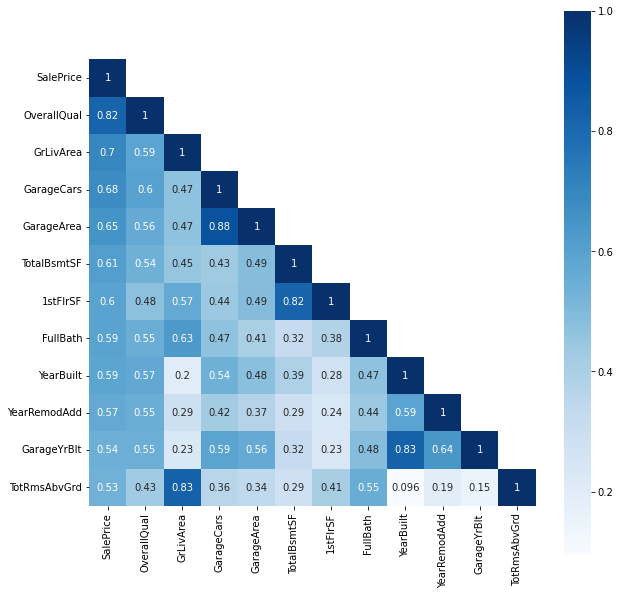

In [270]:
# Hago un heatmap con las columnas que mas correlacion tienen con la columna objetivo
cor_mat= data_train[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','YearRemodAdd','GarageYrBlt','TotRmsAbvGrd']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap='Blues')


Analisis de columnas con mas correlación

OverallQual

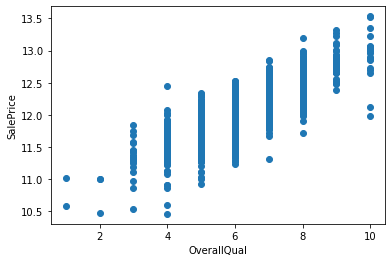

In [271]:
#Hago un analisis bivariado de las columnas con mas correlación

fig, ax = plt.subplots()
ax.scatter(x = data_train['OverallQual'], y = data_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.show()

GrLivArea

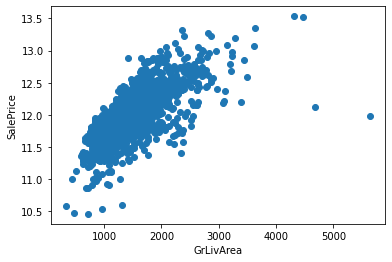

In [272]:
fig, ax = plt.subplots()
ax.scatter(x = data_train['GrLivArea'], y = data_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

GarageCars

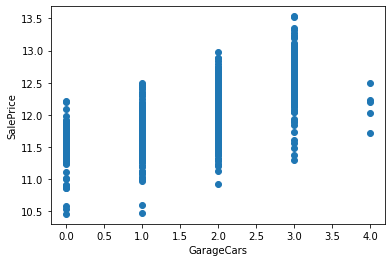

In [273]:
fig, ax = plt.subplots()
ax.scatter(x = data_train['GarageCars'], y = data_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageCars')
plt.show()

GarageArea

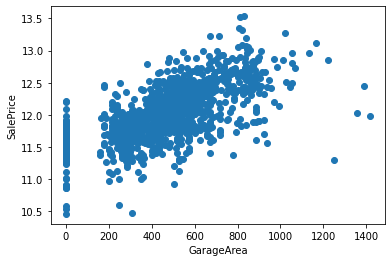

In [274]:
fig, ax = plt.subplots()
ax.scatter(x = data_train['GarageArea'], y = data_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageArea')
plt.show()

TotalBsmtSF

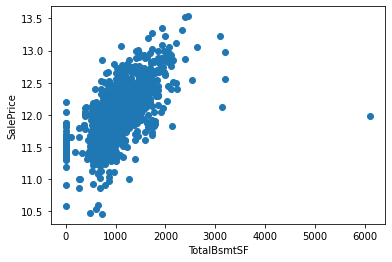

In [275]:
fig, ax = plt.subplots()
ax.scatter(x = data_train['TotalBsmtSF'], y = data_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()

1stFlrSF

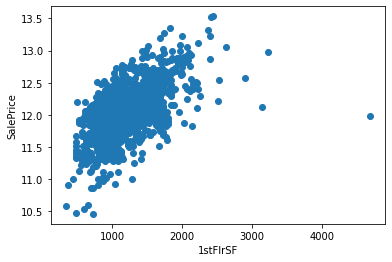

In [276]:
fig, ax = plt.subplots()
ax.scatter(x = data_train['1stFlrSF'], y = data_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('1stFlrSF')
plt.show()

FullBath

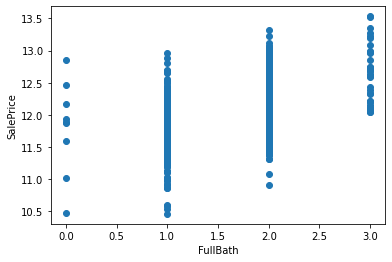

In [277]:
fig, ax = plt.subplots()
ax.scatter(x = data_train['FullBath'], y = data_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('FullBath')
plt.show()

TotRmsAbvGrd

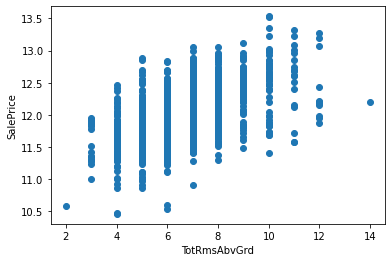

In [278]:
fig, ax = plt.subplots()
ax.scatter(x = data_train['TotRmsAbvGrd'], y = data_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotRmsAbvGrd')
plt.show()

Saco outliers de los dataframes

In [279]:
#datatrain
#Saco outliers grlivarea
data_train = data_train.drop(data_train[(data_train['GrLivArea']>4000)].index)
#Saco outliers TotalBsmtSF
data_train = data_train.drop(data_train[(data_train['TotalBsmtSF']>3000)].index)
#Saco outliers GarageArea
data_train = data_train.drop(data_train[(data_train['GarageArea']>1200)].index)
#Saco outliers 1stFlrSF
data_train = data_train.drop(data_train[(data_train['1stFlrSF']>2700)].index)

In [280]:
data_train.shape

(1448, 80)

In [281]:
#train(df sin columna objetivo)
#Saco outliers grlivarea
train = train.drop(train[(train['GrLivArea']>4000)].index)
#Saco outliers TotalBsmtSF
train = train.drop(train[(train['TotalBsmtSF']>3000)].index)
#Saco outliers GarageArea
train = train.drop(train[(train['GarageArea']>1200)].index)
#Saco outliers 1stFlrSF
train = train.drop(train[(train['1stFlrSF']>2700)].index)

In [282]:
train.shape

(1448, 79)

In [283]:
#Guardo la columna objetivo SalesPrice en una variable
y = data_train.SalePrice
y.shape

(1448,)

,Columna,Valores_nulos,Vacios_porcentaje
16,PoolQC,1443,99.654696
18,MiscFeature,1395,96.339779
1,Alley,1357,93.715470
17,Fence,1168,80.662983
10,FireplaceQu,689,47.582873
0,LotFrontage,256,17.679558
11,GarageType,81,5.593923
12,GarageYrBlt,81,5.593923
13,GarageFinish,81,5.593923
14,GarageQual,81,5.593923


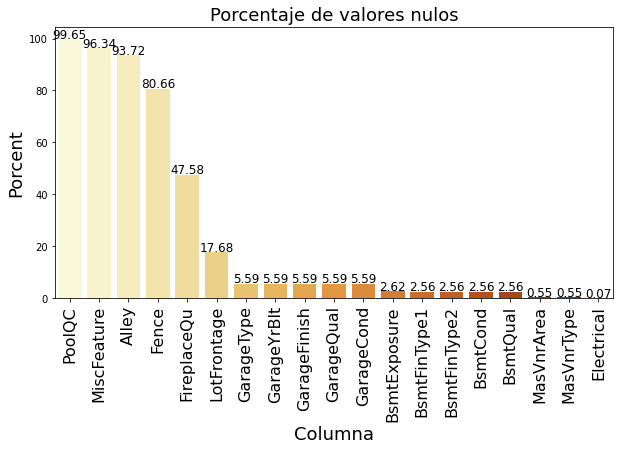

In [284]:
#Tratamiento del resto de los vacios
missings(train)

,Columna,Valores_nulos,Vacios_porcentaje
29,PoolQC,1456,99.794380
31,MiscFeature,1408,96.504455
2,Alley,1352,92.666210
30,Fence,1169,80.123372
21,FireplaceQu,730,50.034270
1,LotFrontage,227,15.558602
28,GarageCond,78,5.346127
23,GarageYrBlt,78,5.346127
27,GarageQual,78,5.346127
24,GarageFinish,78,5.346127


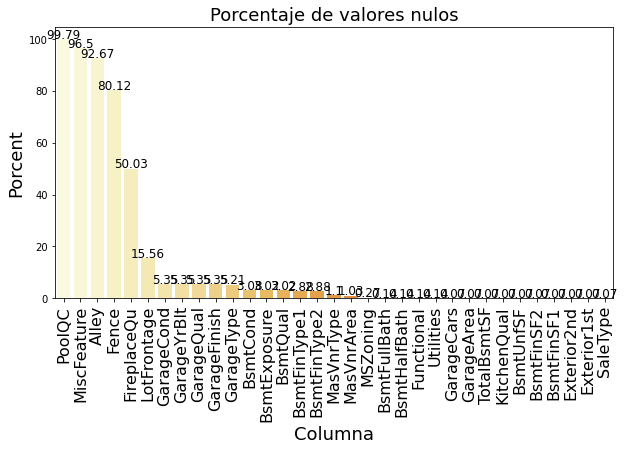

In [285]:
missings(data_test)

In [286]:
#Borro columnas con mas del 25% de nulos de train y test
train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], inplace= True)
data_train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], inplace= True)
data_test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], inplace= True)


In [287]:
data_train.Electrical.unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [288]:
#Lleno columnas con la media o la moda
train['LotFrontage'].fillna(np.mean(train['LotFrontage']),inplace=True)
data_test['LotFrontage'].fillna(np.mean(data_test['LotFrontage']),inplace=True)


train['MSZoning'].fillna(train['MSZoning'].mode()[0],inplace=True)
data_test['MSZoning'].fillna(data_test['MSZoning'].mode()[0],inplace=True)

train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

for col in ['Functional','SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
  data_test[col].fillna(data_test[col].mode()[0],inplace=True)

In [289]:
#Luego lleno los vacios restantes con 'Sin Dato' o 0 en train
for col in ('GarageQual','GarageFinish','GarageCond','GarageType', 'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrType'):
  train[col].fillna('Sin Dato',inplace=True)
for col in ('GarageYrBlt','GarageArea','GarageCars', 'MasVnrArea'):
  train[col].fillna(0,inplace=True)


In [290]:
##Lleno los vacios en test con 'Sin Dato' o 0 
for col in ('GarageQual','GarageFinish','GarageCond','GarageType', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'BsmtCond', 'MasVnrType'):
  data_test[col].fillna('Sin Dato',inplace=True)
for col in ('GarageYrBlt','GarageArea','GarageCars', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFullBath','TotalBsmtSF', 'BsmtFinSF2','BsmtFinSF1','BsmtUnfSF'):
  data_test[col].fillna(0,inplace=True)

In [291]:
#Analizo Utilities en test y train, tienen valores distintos entonces borro la columna porque no se con que llenarla
data_test.Utilities.unique()

array(['AllPub', nan], dtype=object)

In [292]:
data_train.Utilities.unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [293]:
#Como Utilities tiene 2 valores distintos en train y test borro las columnas
train.drop(columns=['Utilities'], inplace=True)
data_test.drop(columns=['Utilities'], inplace=True)

Separo variable cuantitativas y cualitativas

In [294]:
#VARIABLES CUANTITATIVAS
cuantitativas=train.select_dtypes(include='number')
cuantitativas.shape

(1448, 36)

In [295]:
#VARIABLES CUALITATIVAS
cualitativas = train.select_dtypes(include='object')
cualitativas.shape

(1448, 37)

In [296]:
#Aplico labelencode a las columnas cualitativas de train
for col in cualitativas.columns:
    if(train[col].dtype == 'object'):
      le=LabelEncoder()
      train[col]=le.fit_transform(train[col])

In [297]:
#Aplico labelencode a las columnas cualitativas del data_test
for col in cualitativas.columns:
    if(data_test[col].dtype == 'object'):
      le=LabelEncoder()
      data_test[col]=le.fit_transform(data_test[col])

In [298]:
#Chequeo que train y test hayan quedado con las mismas columnas
train.shape

(1448, 73)

In [299]:
data_test.shape

(1459, 73)

In [300]:
y.shape

(1448,)

In [301]:
#Columnas mas relacionadas con el objetivo
data_train.corr()['SalePrice'].sort_values(ascending=False).head(85)

SalePrice        1.000000
OverallQual      0.816990
GrLivArea        0.715956
GarageCars       0.684863
GarageArea       0.668131
TotalBsmtSF      0.637282
1stFlrSF         0.608247
FullBath         0.588467
YearBuilt        0.587167
YearRemodAdd     0.567946
GarageYrBlt      0.544559
TotRmsAbvGrd     0.529291
Fireplaces       0.483807
MasVnrArea       0.428990
BsmtFinSF1       0.372999
LotFrontage      0.362303
WoodDeckSF       0.334431
OpenPorchSF      0.328196
HalfBath         0.318386
2ndFlrSF         0.315426
LotArea          0.260153
BsmtFullBath     0.233445
BsmtUnfSF        0.219282
BedroomAbvGr     0.207439
ScreenPorch      0.120760
MoSold           0.065311
3SsnPorch        0.057385
PoolArea         0.041459
BsmtFinSF2      -0.003849
BsmtHalfBath    -0.013523
MiscVal         -0.017948
OverallCond     -0.035789
YrSold          -0.037193
LowQualFinSF    -0.037261
MSSubClass      -0.070152
KitchenAbvGr    -0.147926
EnclosedPorch   -0.159786
Name: SalePrice, dtype: float64

MODELO ML

In [302]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

In [303]:
# Tomo las 24 columnas con mayor correlacion con SalesPrice
x = train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','OpenPorchSF','WoodDeckSF','2ndFlrSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch']]
x.shape

(1448, 24)

In [304]:
#Defino conjuntos de train y test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

#Modelo
model= RandomForestRegressor(n_estimators=130, random_state=25)

#Entreno modelo
model.fit(x_train, y_train)

#Prediccion y error
pred=model.predict(x_test)
print('El error es de:',(mean_squared_log_error( y_test, pred, squared=False)))

El error es de: 0.009752815469273955


In [305]:
#Score del modelo
print('El score del modelo es de:', model.score(x_test,y_test))

El score del modelo es de: 0.8992426341348648


APLICO EL MODELO AL DATASET DE TEST

In [306]:
#Aplico el modelo al dataset de test
x = train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','OpenPorchSF','WoodDeckSF','2ndFlrSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch']]
xt = data_test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt','TotRmsAbvGrd','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','OpenPorchSF','WoodDeckSF','2ndFlrSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF','BedroomAbvGr','ScreenPorch']]

In [307]:
#Defino conjuntos de train y test
x_train, x_test, y_train  = x, xt, y

#
model= RandomForestRegressor(n_estimators=130, random_state=25)

#entreno el modelo
model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=130, random_state=25)

In [308]:
#Creo la prediccion
pred=model.predict(x_test)
pred


array([11.73087079, 11.92665936, 12.11391867, ..., 12.01913303,
       11.59763679, 12.37244975])

In [309]:
#Le saco el logaritmo al precio que le habia aplicado para que tenga una distribucion normal expm1 es la inversa del logaritmo
pred = np.expm1(pred)

In [310]:
pred

array([124350.90748124, 151244.45942004, 182391.94454451, ...,
       165897.76501522, 108839.28240119, 236202.67785361])

In [311]:
print(len(pred))
print(data_test.shape)

1459
(1459, 73)


In [312]:
resultado = pd.DataFrame((pred), columns=['pred'])
resultado


,pred
0,124350.907481
1,151244.459420
2,182391.944545
3,183090.773170
4,197515.494197
...,...
1454,74264.545596
1455,83968.705165
1456,165897.765015
1457,108839.282401


In [313]:
resultado.to_csv('pred_test.csv', index=False)
